# Task 1: XOR

In [2]:
# Import modules
from __future__ import print_function
import tensorflow as tf
import numpy as np
from numpy.random import shuffle
import time
import matplotlib.pyplot as plt

# Plot configurations
% matplotlib inline

# Notebook auto reloads code. (Ref: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)
% load_ext autoreload
% autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 1, Part 1: Backpropagation through time (BPTT)

**Question:** Consider a simple RNN network shown in the following figure, where __ _wi, wh, b, a, c_ __ are the scalar parameters of the network. The loss function is the **mean squared error (MSE)**. Given input (x0, x1) = (1, 0), ground truth (g1, g2) = (1, 1), h0 = 0, (wi, wh, b, a, c) = (1, 1, 1, 1, 1), compute __ _(dwi, dwh, db, da, dc)_ __, which are the gradients of loss with repect to 5 parameters __ _(wi, wh, b, a, c)_ __.

![bptt](./img/bptt.png)
![bptt](./img/new%20doc%202017-11-23%2019.16.29_1.jpg)
![bptt](./img/new%20doc%202017-11-23%2019.16.29_2.jpg)
![bptt](./img/new%20doc%202017-11-23%2019.16.29_3.jpg)
![bptt](./img/new%20doc%202017-11-23%2019.16.29_4.jpg)


<span style="color:red">TODO:</span>

Answer the above question. 

* **[fill in here: Enter your derivations and the computational process]**
* You can use LATEX to edit the equations, and Jupyter notebook can recognize basic LATEX syntax. Alternatively, you can edit equations in some other environment and then paste the screenshot of the equations here.

## Task 1, Part 2: Use tensorflow modules to create XOR network

In this part, you need to build and train an XOR network that can learn the XOR function. It is a very simple implementation of RNN and will give you an idea how RNN is built and how to train it.

### XOR network

XOR network can learn the XOR $\oplus$ function

As shown in the figure below, and for instance, if input $(x0, x1, x2)$=(1,0,0), then output $(y1, y2, y3)$=(1,1,1). That is, $y_n = x_0\oplus x_1 \oplus ... \oplus x_{n-1}$

![xor_net](./img/xor.png)

### Create data set
This function provides you the way to generate the data which is required for the training process. You should utilize it when building your training function for the LSTM. Please read the source code for more information.

In [3]:
from ecbm4040.xor.utils import create_dataset

### Build a network using a Tensorlow LSTMCell
This section shows an example how to build a RNN network using an LSTM cell. LSTM cell is an inbuilt class in tensorflow which implements the real behavior of the LSTM neuron. 

Reference: [TensorFlow LSTM cell](https://www.tensorflow.org/api_docs/python/tf/contrib/rnn/LSTMCell)

In [4]:
from tensorflow.contrib.rnn import LSTMCell

tf.reset_default_graph()

# Input shape: (num_samples, seq_length, input_dimension)
# Output shape: (num_samples, output_ground_truth), and output_ground_truth is 0/1. 
input_data = tf.placeholder(tf.float32,shape=[None,None,1])
output_data = tf.placeholder(tf.int64,shape=[None,None])

# define LSTM cell
lstm_units = 64
cell = LSTMCell(lstm_units,num_proj=2,state_is_tuple=True)

# create LSTM network: you can also choose other modules provided by tensorflow, like static_rnn etc.
out,_ = tf.nn.dynamic_rnn(cell,input_data,dtype=tf.float32)
pred = tf.argmax(out,axis=2)

# loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=output_data,logits=out))

# optimization
optimizer = tf.train.AdamOptimizer(learning_rate=0.1).minimize(loss)

# accuracy
correct_num = tf.equal(output_data,pred)
accuracy = tf.reduce_mean(tf.cast(correct_num,tf.float32))

### Training 

<span style='color:red'>TODO:</span> 
1. Build your training funciton for RNN; 
2. Plot the cost during the traning

In [5]:
# YOUR TRAINING AND PLOTTING CODE HERE
seq = 8
num = 80000
x_train, y_train = create_dataset(num, seq)
loss_list = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for e in range(500):        
        sess.run(optimizer, feed_dict={input_data: x_train, output_data: y_train})
        cost = sess.run(loss, feed_dict={input_data: x_train, output_data: y_train})
        loss_list.append(cost)
        #val_acc = sess.run(accuracy, feed_dict={input_data: x_train, output_data: y_train})
        print('epoch {}: cost = {}'.format(e+1, cost))

epoch 1: cost = 0.6935372352600098
epoch 2: cost = 0.718052327632904
epoch 3: cost = 0.6871679425239563
epoch 4: cost = 0.6904483437538147
epoch 5: cost = 0.6847202181816101
epoch 6: cost = 0.6792130470275879
epoch 7: cost = 0.675045907497406
epoch 8: cost = 0.6581782698631287
epoch 9: cost = 0.6253930926322937
epoch 10: cost = 0.564041018486023
epoch 11: cost = 0.4401605725288391
epoch 12: cost = 0.2998155951499939
epoch 13: cost = 0.35328397154808044
epoch 14: cost = 0.35164427757263184
epoch 15: cost = 0.2856018841266632
epoch 16: cost = 0.270638108253479
epoch 17: cost = 0.20932818949222565
epoch 18: cost = 0.36512911319732666
epoch 19: cost = 0.2583227753639221
epoch 20: cost = 0.25617942214012146
epoch 21: cost = 0.1626823991537094
epoch 22: cost = 0.16349565982818604
epoch 23: cost = 0.1645912379026413
epoch 24: cost = 0.15633054077625275
epoch 25: cost = 0.1595650017261505
epoch 26: cost = 0.16914573311805725
epoch 27: cost = 0.14684054255485535
epoch 28: cost = 0.1222235113382

epoch 210: cost = 0.0001673773949733004
epoch 211: cost = 0.00016601804236415774
epoch 212: cost = 0.0001646828168304637
epoch 213: cost = 0.0001633601204957813
epoch 214: cost = 0.00016204395797103643
epoch 215: cost = 0.00016075493476819247
epoch 216: cost = 0.00015947266365401447
epoch 217: cost = 0.00015821968554519117
epoch 218: cost = 0.00015696189075242728
epoch 219: cost = 0.00015573110431432724
epoch 220: cost = 0.00015451062063220888
epoch 221: cost = 0.0001533126924186945
epoch 222: cost = 0.00015213005826808512
epoch 223: cost = 0.0001509503781562671
epoch 224: cost = 0.00014979843399487436
epoch 225: cost = 0.00014865152479615062
epoch 226: cost = 0.00014751234266441315
epoch 227: cost = 0.0001463864609831944
epoch 228: cost = 0.0001452853175578639
epoch 229: cost = 0.00014419533545151353
epoch 230: cost = 0.0001430974662071094
epoch 231: cost = 0.0001420416374458
epoch 232: cost = 0.00014098442625254393
epoch 233: cost = 0.00013993089669384062
epoch 234: cost = 0.00013890

epoch 414: cost = 5.103440707898699e-05
epoch 415: cost = 5.081661947770044e-05
epoch 416: cost = 5.060397961642593e-05
epoch 417: cost = 5.0394286517985165e-05
epoch 418: cost = 5.0181744882138446e-05
epoch 419: cost = 4.997511859983206e-05
epoch 420: cost = 4.9763857532525435e-05
epoch 421: cost = 4.956272096023895e-05
epoch 422: cost = 4.935901961289346e-05
epoch 423: cost = 4.9148402467835695e-05
epoch 424: cost = 4.8942689318209887e-05
epoch 425: cost = 4.873527723248117e-05
epoch 426: cost = 4.8544177843723446e-05
epoch 427: cost = 4.8343485104851425e-05
epoch 428: cost = 4.8146041081054136e-05
epoch 429: cost = 4.794183041667566e-05
epoch 430: cost = 4.77566100016702e-05
epoch 431: cost = 4.755697227665223e-05
epoch 432: cost = 4.736769915325567e-05
epoch 433: cost = 4.717555930255912e-05
epoch 434: cost = 4.698391057900153e-05
epoch 435: cost = 4.680010533775203e-05
epoch 436: cost = 4.659740443457849e-05
epoch 437: cost = 4.6424025640590116e-05
epoch 438: cost = 4.623600034392

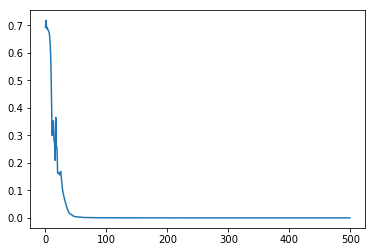

In [6]:
plt.plot(loss_list)
plt.show()

## Task 1, Part 3 :  Build your own LSTMCell
In this part, you need to build your own LSTM cell to achieve the LSTM functionality. 

<span style="color:red">TODO:</span> 
1. Finish class **MyLSTMCell** in ecbm4040/xor/rnn.py;
2. Write the training function for your RNN;
3. Plot the cost during training.

In [9]:
from ecbm4040.xor.rnn import MyLSTMCell

# recreate xor netowrk with your own LSTM cell
tf.reset_default_graph()

#Input shape: (num_samples,seq_length,input_dimension)
#Output shape: (num_samples, output_ground_truth), and output_ground_truth is 0/1. 
input_data = tf.placeholder(tf.float32,shape=[None,None,1])
output_data = tf.placeholder(tf.int64,shape=[None,None])

# recreate xor netowrk with your own LSTM cell
lstm_units = 64
cell = MyLSTMCell(lstm_units,num_proj=2)

# create LSTM network: you can also choose other modules provided by tensorflow, like static_rnn etc.
out,_ = tf.nn.dynamic_rnn(cell,input_data,dtype=tf.float32)
pred = tf.argmax(out,axis=2)

# loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=output_data,logits=out))
# optimization
optimizer = tf.train.AdamOptimizer(learning_rate=0.1).minimize(loss)
# accuracy
correct = tf.equal(output_data,pred)
accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))

### Training

In [10]:
# YOUR TRAINING AND PLOTTING CODE HERE
seq = 8
num = 80000
x_train, y_train = create_dataset(num, seq)
loss_list = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for e in range(500):        
        sess.run(optimizer, feed_dict={input_data: x_train, output_data: y_train})
        cost = sess.run(loss, feed_dict={input_data: x_train, output_data: y_train})
        loss_list.append(cost)
        #val_acc = sess.run(accuracy, feed_dict={input_data: x_train, output_data: y_train})
        print('epoch {}: cost = {}'.format(e+1, cost))

epoch 1: cost = 0.826812744140625
epoch 2: cost = 0.6954034566879272
epoch 3: cost = 0.7100160121917725
epoch 4: cost = 0.6972060799598694
epoch 5: cost = 0.6899440884590149
epoch 6: cost = 0.6894816160202026
epoch 7: cost = 0.6896514892578125
epoch 8: cost = 0.6817203164100647
epoch 9: cost = 0.674357533454895
epoch 10: cost = 0.6678817868232727
epoch 11: cost = 0.6453148722648621
epoch 12: cost = 0.7107899188995361
epoch 13: cost = 0.6277452111244202
epoch 14: cost = 0.6559051871299744
epoch 15: cost = 0.6652037501335144
epoch 16: cost = 0.6718292236328125
epoch 17: cost = 0.6764894127845764
epoch 18: cost = 0.6793209314346313
epoch 19: cost = 0.6806581616401672
epoch 20: cost = 0.680648148059845
epoch 21: cost = 0.6794642806053162
epoch 22: cost = 0.6774901151657104
epoch 23: cost = 0.6749719977378845
epoch 24: cost = 0.6718114614486694
epoch 25: cost = 0.6679326295852661
epoch 26: cost = 0.6631285548210144
epoch 27: cost = 0.6562228202819824
epoch 28: cost = 0.6444588303565979
epoc

epoch 210: cost = 1.603773307579104e-05
epoch 211: cost = 1.5947776773828082e-05
epoch 212: cost = 1.5852150681894273e-05
epoch 213: cost = 1.5765856005600654e-05
epoch 214: cost = 1.5671714209020138e-05
epoch 215: cost = 1.5585321307298727e-05
epoch 216: cost = 1.549242551845964e-05
epoch 217: cost = 1.5412473658216186e-05
epoch 218: cost = 1.532252827018965e-05
epoch 219: cost = 1.524815979792038e-05
epoch 220: cost = 1.515169697086094e-05
epoch 221: cost = 1.5082631762197707e-05
epoch 222: cost = 1.4986988389864564e-05
epoch 223: cost = 1.4915080100763589e-05
epoch 224: cost = 1.483825508330483e-05
epoch 225: cost = 1.4754969924979378e-05
epoch 226: cost = 1.4676936189061962e-05
epoch 227: cost = 1.4595851098420098e-05
epoch 228: cost = 1.4529613508784678e-05
epoch 229: cost = 1.4452261893893592e-05
epoch 230: cost = 1.4379059393831994e-05
epoch 231: cost = 1.4306493540061638e-05
epoch 232: cost = 1.423201865691226e-05
epoch 233: cost = 1.4158016711007804e-05
epoch 234: cost = 1.409

epoch 413: cost = 7.692402505199425e-06
epoch 414: cost = 7.665679731871933e-06
epoch 415: cost = 7.654753972019535e-06
epoch 416: cost = 7.639125215064269e-06
epoch 417: cost = 7.624404588568723e-06
epoch 418: cost = 7.609166914335219e-06
epoch 419: cost = 7.592137080791872e-06
epoch 420: cost = 7.577886208309792e-06
epoch 421: cost = 7.562320206488948e-06
epoch 422: cost = 7.5476277743291575e-06
epoch 423: cost = 7.527115940320073e-06
epoch 424: cost = 7.507115697080735e-06
epoch 425: cost = 7.497118531318847e-06
epoch 426: cost = 7.479952273570234e-06
epoch 427: cost = 7.464619557140395e-06
epoch 428: cost = 7.447271855198778e-06
epoch 429: cost = 7.423769602610264e-06
epoch 430: cost = 7.407829798466992e-06
epoch 431: cost = 7.398363322863588e-06
epoch 432: cost = 7.381166142295115e-06
epoch 433: cost = 7.3650412559800316e-06
epoch 434: cost = 7.356300102401292e-06
epoch 435: cost = 7.330939297389705e-06
epoch 436: cost = 7.317140898521757e-06
epoch 437: cost = 7.307649866561405e-0

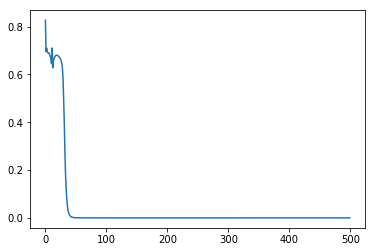

In [11]:
plt.plot(loss_list)
plt.show()

In [12]:
import tensorflow as tf
print (tf.__file__)

/home/ecbm4040/.local/lib/python3.5/site-packages/tensorflow/__init__.py
